In [2]:
from figures import *

In [3]:
# Default parameters.
dt = 1e-2
k0 = 1/10
beta = 1
tau = 50

# Simulation time.
T = 100*tau
cut = round( 10*tau/dt )

# Parameter list for parametric analysis.
n = 160
Nlist = np.linspace( 50,500,n )
gammlist = np.linspace( 0,2,n )
print( gammlist )

[0.    0.013 0.025 0.038 0.05  0.063 0.075 0.088 0.101 0.113 0.126 0.138 0.151 0.164 0.176 0.189 0.201 0.214 0.226 0.239 0.252 0.264 0.277 0.289 0.302 0.314 0.327 0.34  0.352 0.365 0.377 0.39  0.403 0.415 0.428 0.44  0.453 0.465 0.478 0.491 0.503 0.516 0.528 0.541 0.553 0.566 0.579 0.591 0.604 0.616 0.629 0.642 0.654 0.667 0.679 0.692 0.704 0.717 0.73  0.742 0.755 0.767 0.78  0.792 0.805 0.818 0.83  0.843 0.855 0.868 0.881 0.893 0.906 0.918 0.931 0.943 0.956 0.969 0.981 0.994 1.006 1.019 1.031 1.044 1.057 1.069 1.082 1.094 1.107 1.119 1.132 1.145 1.157 1.17  1.182 1.195 1.208 1.22  1.233 1.245 1.258 1.27  1.283 1.296 1.308 1.321 1.333 1.346 1.358 1.371 1.384 1.396 1.409 1.421 1.434 1.447 1.459 1.472 1.484 1.497 1.509 1.522 1.535 1.547 1.56  1.572 1.585 1.597 1.61  1.623 1.635 1.648 1.66  1.673 1.686 1.698 1.711 1.723 1.736 1.748 1.761 1.774 1.786 1.799 1.811 1.824 1.836 1.849 1.862 1.874 1.887 1.899 1.912 1.925 1.937 1.95  1.962 1.975 1.987 2.   ]


In [4]:
runsimulation = 0

# Iterate through parameter combinations, computing metrics.
paramslist = [createparams( N, [beta, gamm], tau, k0=k0 ) for gamm in gammlist for N in Nlist]

if runsimulation:
    metricdata = np.array( Parallel( n_jobs=-1 )(
        delayed( computemetrics )( params ) for params in paramslist ) )

    # Unpack metric data.
    paramsdata = np.array( paramslist ).reshape( n,n )
    aperddata = metricdata[:,0].reshape( n,n )
    ameandata = metricdata[:,1].reshape( n,n )
    apeakdata = metricdata[:,2].reshape( n,n )
else:
    aperddata = loaddata( '../data/results/parametric_gamm/aperddata' )
    ameandata = loaddata( '../data/results/parametric_gamm/ameandata' )
    apeakdata = loaddata( '../data/results/parametric_gamm/apeakdata' )

In [5]:
if runsimulation:
    savedata( '../data/results/parametric_gamm/aperddata', aperddata )
    savedata( '../data/results/parametric_gamm/ameandata', ameandata )
    savedata( '../data/results/parametric_gamm/apeakdata', apeakdata )

In [6]:
# Compute scaling with N as a function of social deactivation.
fitmeangamm = [fitscalinglaw( Nlist, Nlist*alist ) for alist in ameandata]
fitpeakgamm = [fitscalinglaw( Nlist, Nlist*alist ) for alist in apeakdata]
fitperdgamm = [fitscalinglaw( Nlist, Tlist ) for Tlist in aperddata]

# Extract scaling coefficients and confidence intervals.
psimeanlist = np.array( [fit.params[1] for fit in fitmeangamm] )
cimeanlist = np.array( [fit.conf_int()[1] for fit in fitmeangamm] )

psipeaklist = np.array( [fit.params[1] for fit in fitpeakgamm] )
cipeaklist = np.array( [fit.conf_int()[1] for fit in fitpeakgamm] )

psiperdlist = np.array( [fit.params[1] for fit in fitperdgamm] )
ciperdlist = np.array( [fit.conf_int()[1] for fit in fitperdgamm] )

print( psimeanlist )
print( psipeaklist )
print( psiperdlist )

[1.041 1.03  1.021 1.013 1.007 1.001 0.996 0.992 0.989 0.987 0.985 0.984 0.982 0.98  0.979 0.978 0.976 0.975 0.973 0.971 0.969 0.966 0.964 0.961 0.959 0.957 0.956 0.954 0.952 0.95  0.949 0.947 0.945 0.943 0.942 0.94  0.939 0.937 0.936 0.934 0.933 0.931 0.929 0.928 0.926 0.925 0.924 0.922 0.921 0.919 0.918 0.917 0.916 0.915 0.914 0.912 0.911 0.91  0.909 0.908 0.907 0.906 0.905 0.904 0.903 0.902 0.901 0.9   0.899 0.898 0.898 0.897 0.896 0.895 0.894 0.893 0.893 0.892 0.891 0.89  0.89  0.889 0.888 0.887 0.887 0.886 0.885 0.885 0.884 0.883 0.883 0.882 0.881 0.881 0.88  0.88  0.879 0.878 0.878 0.877 0.877 0.876 0.876 0.875 0.874 0.874 0.873 0.873 0.872 0.872 0.871 0.871 0.87  0.87  0.869 0.869 0.869 0.868 0.868 0.867 0.867 0.867 0.866 0.866 0.866 0.865 0.865 0.865 0.864 0.864 0.864 0.864 0.863 0.863 0.863 0.863 0.863 0.863 0.862 0.862 0.862 0.862 0.862 0.862 0.862 0.862 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.861 0.86 ]
[0.948 0.906 0.863 0.819 0.775 0.733 0

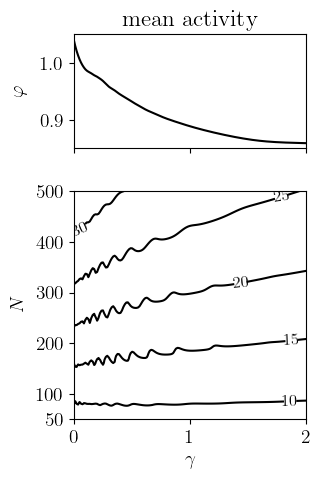

In [7]:
# Plot evolution of time-series and poincare map intersections.
fig = plt.figure()
gvar = gs.GridSpec( 2,1,height_ratios=[1,2],hspace=1/4 )

atemp = fig.add_subplot( gvar[1] )
axs = [
    fig.add_subplot( gvar[0], sharex=atemp ),
    atemp]

# Scaling laws across gamma.
axs[0].plot( gammlist, psimeanlist, color='k' )
# axs[0].fill_between( gammlist, cimeanlist.T[0], cimeanlist.T[1], color='gray', alpha=1/2 )

# axs[0].set_ylim( [0.80, 0.95] )
# axs[0].set_yticks( [0.8,0.85,0.9,0.95] )

axs[0].set_ylabel( '$\\varphi$' )
axs[0].set_title( 'mean activity' )

axs[0].tick_params( labelbottom=False )

# Contour plot.
ivar = axs[1].contour( gammlist, Nlist, Nlist[:,None]*ameandata,
    levels=[5*k for k in range( 2,12 )], colors='k' )
plt.clabel( ivar, inline=True, fontsize=12, fmt='%i' )

axs[1].set_ylim( [Nlist[0],Nlist[-1]] )
axs[1].set_yticks( [50, 100, 200, 300, 400, 500] )

axs[1].set_xlabel( '$\\gamma$' )
axs[1].set_ylabel( '$N$' )

for a in axs:
    a.yaxis.set_label_coords(-0.20, 0.5)

fig.set_figwidth( 3 )
fig.set_figheight( 5 )
# fig.tight_layout()

if 0:
    savefigure( fig, 'results/parametric_mean_Na' )

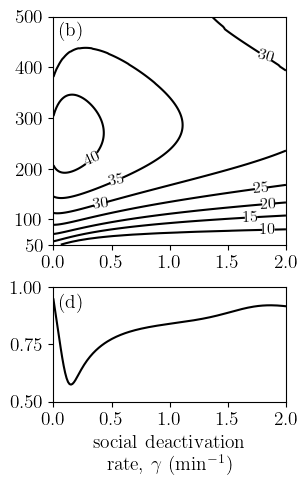

In [12]:
# Plot evolution of time-series and poincare map intersections.
fig = plt.figure()
gvar = gs.GridSpec( 2,1,height_ratios=[2,1],hspace=1/4 )

atemp = fig.add_subplot( gvar[0] )
axs = [
    fig.add_subplot( gvar[1] ),
    atemp]

# Scaling laws across gamma.
axs[0].plot( gammlist, psipeaklist, color='k' )
# axs[0].fill_between( gammlist, cipeaklist.T[0], cipeaklist.T[1], color='gray', alpha=1/2 )

axs[0].text( 0.05, 0.975, '(d)', va='top', ha='left' )

axs[0].set_ylim( [0.5, 1] )
# axs[0].set_yticks( [0.4, 0.8, 1.2] )

axs[0].set_xlabel( 'social deactivation\nrate, $\\gamma$ (min$^{-1}$)' )
# axs[0].set_ylabel( 'scaling exponent, $\\varphi$' )

# Contour plot.
ivar = axs[1].contour( gammlist, Nlist, Nlist[:,None]*apeakdata, colors='k' )
plt.clabel( ivar, inline=True, fontsize=12, fmt='%i' )

axs[1].text( 0.05, 490, '(b)', va='top', ha='left' )

axs[1].set_ylim( [Nlist[0],Nlist[-1]] )
axs[1].set_yticks( [50, 100, 200, 300, 400, 500] )
# axs[1].tick_params( labelbottom=False )

# axs[1].set_ylabel( 'colony size, $N$' )

for a in axs:
    a.set_xlim( [gammlist[0],gammlist[-1]] )
    a.set_xticks( [0, 0.5, 1, 1.5, 2] )
    a.yaxis.set_label_coords(-0.25, 0.5)

fig.set_figwidth( 3 )
fig.set_figheight( 5 )
# fig.tight_layout()

if 0:
    savefigure( fig, 'results/parametric_peak_Na' )

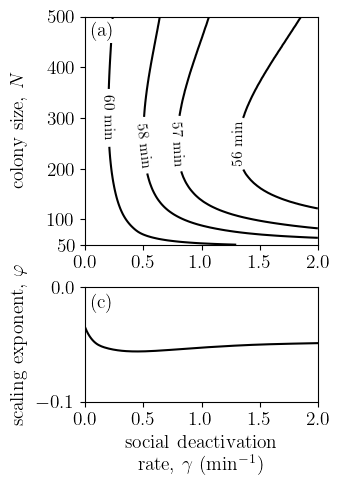

In [15]:
# Plot evolution of time-series and poincare map intersections.
fig = plt.figure()
gvar = gs.GridSpec( 2,1,height_ratios=[2,1],hspace=1/4 )

atemp = fig.add_subplot( gvar[0] )
axs = [
    fig.add_subplot( gvar[1] ),
    atemp]

# Scaling laws across gamma.
axs[0].plot( gammlist, psiperdlist, color='k' )
# axs[0].fill_between( gammlist, ciperdlist.T[0], ciperdlist.T[1],
#     color='gray', alpha=1/2, label='$95\\%$ CI' )

axs[0].text( 0.05, -0.005, '(c)', va='top', ha='left' )

axs[0].set_ylim( [-0.1,0] )
axs[0].set_yticks( [-0.1,0] )

axs[0].set_xlabel( 'social deactivation\nrate, $\\gamma$ (min$^{-1}$)' )
axs[0].set_ylabel( 'scaling exponent, $\\varphi$' )
# axs[0].legend( loc=4 )

# Contour plot.
levellist = [56, 57, 58, 60]
loclist = [(1.2, 250), (0.9, 250), (0.6, 250), (0.2, 300)]
ivar = axs[1].contour( gammlist, Nlist, aperddata, levels=levellist, colors='k' )
plt.clabel( ivar, inline=True, fontsize=11,
    fmt={level: '%i min'%level for level in levellist},
    manual=loclist )

axs[1].text( 0.05, 490, '(a)', va='top', ha='left',
    bbox=dict(facecolor='white', edgecolor='none', pad=1.5) )

axs[1].set_ylim( [Nlist[0],Nlist[-1]] )
axs[1].set_yticks( [50, 100, 200, 300, 400, 500] )
# axs[1].tick_params( labelbottom=False )

axs[1].set_ylabel( 'colony size, $N$' )

for a in axs:
    a.set_xlim( [gammlist[0],gammlist[-1]] )
    a.set_xticks( [0, 0.5, 1, 1.5, 2] )
    a.yaxis.set_label_coords(-0.25, 0.5)

fig.set_figwidth( 3 )
fig.set_figheight( 5 )
# fig.tight_layout()

if 0:
    savefigure( fig, 'results/parametric_perd' )